# Import Libraries

In [2]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from scipy.stats import chi2_contingency
import re

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)


## Read Data

In [3]:
app_df = pd.read_csv(r'D:\archive\Wuzzuf_Applications_Sample.csv', sep = ',', engine = 'python', quotechar = '"')
posts_df = pd.read_csv(r'D:\archive\Wuzzuf_Job_Posts_Sample.csv', sep = ',', engine = 'python', quotechar = '"')

## Merge Data from Job Posts and Applications

In [4]:
#merge applicant with job post
data_df = posts_df.merge(app_df.groupby('job_id').agg(applicant_count=pd.NamedAgg(column="job_id", aggfunc="count")).reset_index(),
                         right_on = 'job_id',left_on = 'id')

data_df.head(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency,job_id,applicant_count
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,516e4ed,184
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound,a361ef59,63
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound,7226ce78,159


## Data Wrangling

In [5]:
data_df.head(5)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency,job_id,applicant_count
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound,516e4ed,184
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound,a361ef59,63
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound,7226ce78,159
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000,3500,1,Entry Level,1-2,2014-01-02 12:01:23,2042,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound,f4b2bcd6,82
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000,8000,1,Experienced (Non-Manager),1-3,2014-01-21 13:45:56,5684,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound,3fee6f73,407


In [6]:
data_df.describe()

,salary_minimum,salary_maximum,num_vacancies,views,applicant_count
count,19208.000000,19208.000000,19208.000000,19208.000000,19208.000000
mean,3205.061849,5382.659048,5.195387,1529.260881,96.532174
std,3695.164282,10275.317498,15.230045,1017.128187,91.853962
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1500.000000,2500.000000,1.000000,947.000000,41.000000
50%,2500.000000,4000.000000,1.000000,1327.000000,73.000000
75%,4000.000000,6000.000000,3.000000,1880.000000,122.000000
max,250000.000000,1000000.000000,100.000000,37568.000000,2306.000000


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19208 entries, 0 to 19207
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                19208 non-null  object
 1   city              19208 non-null  object
 2   job_title         19208 non-null  object
 3   job_category1     19208 non-null  object
 4   job_category2     19208 non-null  object
 5   job_category3     19208 non-null  object
 6   job_industry1     19208 non-null  object
 7   job_industry2     19208 non-null  object
 8   job_industry3     19208 non-null  object
 9   salary_minimum    19208 non-null  int64 
 10  salary_maximum    19208 non-null  int64 
 11  num_vacancies     19208 non-null  int64 
 12  career_level      19208 non-null  object
 13  experience_years  19208 non-null  object
 14  post_date         19208 non-null  object
 15  views             19208 non-null  int64 
 16  job_description   19068 non-null  object
 17  job_requirem

In [8]:
data_df.shape

(19208, 22)

In [9]:
data_df.isnull().sum()

id                     0
city                   0
job_title              0
job_category1          0
job_category2          0
job_category3          0
job_industry1          0
job_industry2          0
job_industry3          0
salary_minimum         0
salary_maximum         0
num_vacancies          0
career_level           0
experience_years       0
post_date              0
views                  0
job_description      140
job_requirements    1989
payment_period         0
currency               0
job_id                 0
applicant_count        0
dtype: int64

In [10]:
data_df.duplicated().sum()

0

## Data Cleaning

## Clean Category and Industry

In [11]:
job_category1 = data_df['job_category1'].unique()
job_category2 = data_df['job_category2'].unique()

# add all Categories in list.
categories = list(job_category2)
for v in job_category1:
    if v in categories:
        categories.append(v)
        
categories.remove('Select')

job_industry1 = data_df['job_industry1'].unique()
job_industry2 = data_df['job_industry2'].unique()

# add all Industry in list.
industry = list(job_industry2)
for v in job_industry1:
    if v in industry:
        industry.append(v)
        
industry.remove('Select')

# add career_levels and Payment_periods
career_levels = data_df['career_level'].unique()
payment_periods = data_df['payment_period'].unique()

In [12]:
#Remove redudant data.

# data_df.drop(['job_id','user_id', 'id_y', 'id_x'], axis=1,inplace=True)
data_df.drop(['job_industry2', 'job_industry3'],axis=1, inplace=True)
data_df.drop(['job_category2', 'job_category3'], axis=1, inplace=True)
data_df.drop(['job_description','job_requirements'],axis=1,inplace=True)

data_df = data_df[data_df.salary_minimum >= 0] 
data_df = data_df[data_df.salary_maximum > 0] 

data_df = data_df[data_df.views > 0] 
data_df = data_df[data_df.num_vacancies > 0] 

# Transfer Post_date from Object To DateTime
data_df["post_date"] = pd.to_datetime(data_df["post_date"])

data_df = data_df.drop_duplicates()

#rename
data_df.rename(columns = {'job_industry1':'industry', 'job_category1': 'category'}, inplace = True)

In [13]:
data_df.shape

(19098, 16)

## City

In [14]:
## we get code from https://www.kaggle.com/code/hindamosh/cleaning-data

def strip_city_name(x):
    if x[-1] ==',':
        x = x[:-1]
    return x.lower().replace('- ',',').replace('&',',').replace('/',',').replace('.','').replace(', ',',').replace(' ,',',').replace(' and ',',').replace('el ','').replace('el-','').strip()

In [15]:
# this part is hard coded as I don't know other way to do it
# collect the words relative for each group
# abroad  in relative to Egypt
abroad = ['SHARJAH','Riyadh', 'travel jeddah' ,'الرياض', 'ابها', 'Riyadh, Saudi Arabia' ,'Riyadh, KSA','Dubai','Middle East','Global']
# remote work either online or from home
remote = ['Remote (Work from Home)','Remote','Remotely from home',  'manalonline' ,'Online From Home', 'Work from home']
# unspecified job posts
unknwon =['To be definied','outside cairo']
# west of Egypt
west_region =['North Coast','North Cost','Marsa Matrouh','Alamein','North Cost']
# Upper Eegypt and Red Sea areas
upper_redsea_regions =['Hurghada','ASWAN','Marsa Alam','qina','El Fayoum','Bani Suief','El Menya', 
                       'red sea','Sohag','el minya','Aswan/ Qena','Minya - Assiut - Sohag',
                       'Assuit-Menia-Mansoura-El Bhira-Sohag','Upper Egypt & Red Sea','Upper Egypt / Red Sea',
                       'Upper Egypt','الغردقة','Minia','Qena','ain sokhna','Red Sea/ Sinai',
                       'Elwadi Elgded','Owainat East','east oweinat','East Owinat','East Owainat','Owinat East',
                       'Asyut','Ein sokhna','al fayoum','El Menia','luxor','al-minya','Ain El Sokhna','sharm elsheikh',
                       'EL Minia','al ain al sokhna', 'Minya','Wadi El Notron','new valley','Assuit',
                       'Assiut','fayoum']
# sinai area
sinai_region =['Sharm Elkheikh','sinai','South sinai','sharm el shaik','Ariesh','Arish']
# Cario districts
cairo_regions =['kairo','great cairo','maadi','maadi,cairo','Maddi','nasr city' ,'Doki','Mohand','El Mohndseen','Ain Shams',
                'Dokki - Mohandseen','Mohandeseen','Heliopolis','obour' ,'Obour city','nozha' ,"Ma'adi", 'Obour','zamalek',
                'Abou Rawash','Misr- El Gedida','Helwan','5th Settelment','maady','El-Obour','elobour','EL Obour city',
                'elharam','new nozha','Dokki' ,'Ain Shams/ Helwan' , 'El Obour' , 'Mohandessin','Mokattam','alabassia',
                'Mohandiseen','Badr','حلوان','zahraa el maadi','التجمع الأول', 'Haram','Obuor city', 'El-shrouk','مدينة بدر',
                'new egypt','El Obour Industrial City','مدينه نصر', 'newegypt','15th of May','El-Sherouk'] 


In [16]:
def city_cleaner(k):
    k = strip_city_name(k)
    "take k city name as a str and edit it to be as one of the unified categries of Areas as above mentioned lists "
    if k[0] =='c' or k[0] == 'C' and 'Canal' not in k or 'Cairo' in k or 'القاهر' in k or 'Down Town' in k or k in cairo_regions:
        k = 'Cairo'
    elif 'Alex' in k or 'alex' in k or 'الاسكندرية' in k:
        k ='Alexandria'
    elif '6' in k or 'October' in k or 'أكتوبر' in k or 'sheikh zayed' in k or 'Shiekh' in k or 'Sheikh' in k:
        k = 'October'
    elif 'giza' in k.lower() or k.lower() == 'giaz':
        k = 'Giza'
    elif '10' in k :
        k = '10th Ramadan'
    elif 'All ' in k or 'all ' in k or 'Any ' in k or k == 'مصر' or k == 'all' or k =='Egype' or k =='Egypt' or 'anywhere' in k or 'al city' in k or 'Any' in k:
        k = 'All country'
    elif 'Isma' in k or 'Isam' in k or 'Port' in k or 'port' in k or 'Sue' in k or 'الإسماعيلية' in k or 'siuz' in k or 'Canal' in k:
        k = 'Canal'
    elif k in sinai_region:
        k = 'Sinai'
    elif k in west_region:
        k = 'West'
    elif k in upper_redsea_regions:
        k = 'Upper Egypt & Red Sea'
    elif k in abroad:
        k = 'Abroad'
    elif k in remote:
        k = 'Remotely'
    elif k in unknwon:
        k = 'other'
    else:
        k = 'Delta'
    return k

In [17]:
data_df.city = data_df.city.apply(lambda x: city_cleaner(x))

## Unifying Currency

In [18]:
currencies= dict(zip(data_df['currency'].unique(),
            [1, 5.21, 19.13, 23.52, 19.82, 5.09, 5.25, .0007233, 1.4105, 2.1699, 15, 7.0778, .0127, .37]))

data_df['val_currency'] = data_df['currency'].apply(lambda x: currencies.get(x))
data_df = data_df.assign(min_sal_eg=lambda x: x.val_currency * x.salary_minimum)
data_df = data_df.assign(max_sal_eg=lambda x: x.val_currency * x.salary_maximum)
data_df.drop(['val_currency'],axis=1,inplace=True)

## Unifying Salary  with Currency and period

In [19]:
def getSalaryPerMonthForMin(row):

    if 'Per Year' in row.payment_period:
        return row.min_sal_eg / 12
    if 'Per Day' in row.payment_period:
        return row.min_sal_eg * 22
    if 'Per Hour' in row.payment_period:
        return row.min_sal_eg * 40 * 4.1
    if 'Per Week' in row.payment_period:
        return row.min_sal_eg * 4.1
    return row.min_sal_eg
        
def getSalaryPerMonthForMax(row):
    if 'Per Year' in row.payment_period:
        return row.max_sal_eg / 12
    if 'Per Day' in row.payment_period:
        return row.max_sal_eg * 22
    if 'Per Hour' in row.payment_period:
        return row.max_sal_eg * 40 * 4
    if 'Per Week' in row.payment_period:
        return row.max_sal_eg * 4.1
    
    return row.max_sal_eg

def range_salary(row):
    num = 0
    if 'Per Year' in row.payment_period:
        num = ((row.max_sal_eg_period + row.min_sal_eg_period) / 2)
        return num
    elif 'Per Day' in row.payment_period:
        num = ((row.max_sal_eg_period + row.min_sal_eg_period) / 2) 
        return num
    elif 'Per Hour' in row.payment_period:
        num = ((row.max_sal_eg_period + row.min_sal_eg_period) / 2)
        return num
    elif 'Per Week' in row.payment_period:
        num = ((row.max_sal_eg_period + row.min_sal_eg_period) / 2)
        return num
    else:
        num = (row.max_sal_eg_period + row.min_sal_eg_period) / 2
        return num
    

def applayRange(row):
    if row > 20000:
        return 'High'
    elif row > 10000:
        return 'Meduim'
    else:
        return 'Low'
data_df = data_df.assign(min_sal_eg_period=lambda x: getSalaryPerMonthForMin(x))
data_df = data_df.assign(max_sal_eg_period=lambda x: getSalaryPerMonthForMax(x))
data_df = data_df.assign(salary_range=lambda x: range_salary(x))
data_df['salary_range'] = data_df.salary_range.apply(lambda x: applayRange(x))

In [20]:
data_df.head(5)

,id,city,job_title,category,industry,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,payment_period,currency,job_id,applicant_count,min_sal_eg,max_sal_eg,min_sal_eg_period,max_sal_eg_period,salary_range
0,516e4ed,Cairo,Sales & Marketing Agent,Sales/Retail/Business Development,Telecommunications Services,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,Per Month,Egyptian Pound,516e4ed,184,2000.0,3500.0,2000.0,3500.0,Low
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Translation and Localization,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,Per Month,Egyptian Pound,a361ef59,63,1000.0,5000.0,1000.0,5000.0,Low
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Computer Software,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,Per Month,Egyptian Pound,7226ce78,159,2000.0,2500.0,2000.0,2500.0,Low
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Telecommunications Services,2000,3500,1,Entry Level,1-2,2014-01-02 12:01:23,2042,Per Month,Egyptian Pound,f4b2bcd6,82,2000.0,3500.0,2000.0,3500.0,Low
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Food and Beverage Production,5000,8000,1,Experienced (Non-Manager),1-3,2014-01-21 13:45:56,5684,Per Month,Egyptian Pound,3fee6f73,407,5000.0,8000.0,5000.0,8000.0,Low


## Clean Experience level

In [21]:
def getExperience(str_level_exp):
   
    if str_level_exp is not None:
        numbers = re.findall('[0-9]+', str_level_exp)
            
        if len(numbers) > 0:
            max_exp = int(max(numbers))

            if max_exp == 0 or 'month' in str_level_exp.lower():
                return '0'
                
            elif max_exp > 20:
                return '20-25'
            
            elif max_exp > 15:
                return '15-20'
            
            elif max_exp > 10:
                return '10-15'
            
            elif max_exp > 5:
                return '5-10'
            
            elif max_exp > 2:
                return '2-5'
            
            elif max_exp > 0:
                return '0-2'
          
    else:
        return str_level_exp
    
data_df['experience_years'] = data_df['experience_years'].apply(lambda x: getExperience(x))
print(data_df['experience_years'].value_counts()) 

2-5      9748
0-2      6973
5-10     2022
10-15     218
0         101
15-20      29
20-25       7
Name: experience_years, dtype: int64


In [22]:
data_df['experience_years'].value_counts()

2-5      9748
0-2      6973
5-10     2022
10-15     218
0         101
15-20      29
20-25       7
Name: experience_years, dtype: int64

## Split Data into Categorical and numerical

In [23]:
vars_categorical = ['city','job_title', 'salary_range', 'career_level', 'experience_years', 
                    'post_date','payment_period', 'currency']
vars_numerical = ['min_sal_eg_period','max_sal_eg_period', 'num_vacancies', 'views', 'applicant_count']

In [24]:
print('Shape', data_df.shape)
#has Null value
print('is has any duplicated Values?', data_df.duplicated().any())
print('is has any null Values?\n', data_df.isna().sum())

Shape (19098, 21)
is has any duplicated Values? False
is has any null Values?
 id                   0
city                 0
job_title            0
category             0
industry             0
salary_minimum       0
salary_maximum       0
num_vacancies        0
career_level         0
experience_years     0
post_date            0
views                0
payment_period       0
currency             0
job_id               0
applicant_count      0
min_sal_eg           0
max_sal_eg           0
min_sal_eg_period    0
max_sal_eg_period    0
salary_range         0
dtype: int64


## Get Summary Statistics

In [25]:
data_df_summary = data_df[vars_numerical].describe().T
data_df_summary = data_df_summary.rename_axis('column_name').reset_index()
data_df_summary['variance'] = (data_df_summary['std']**2).round(2)
data_df_summary['iqr'] = data_df_summary['75%'] - data_df_summary['25%']

data_df_skeweness = pd.DataFrame(data_df[vars_numerical].skew(skipna = True)).rename_axis('column_name').reset_index().rename(columns = {0: 'skewness'})
data_df_kurtosis = pd.DataFrame(data_df[vars_numerical].kurt(skipna = True)).rename_axis('column_name').reset_index().rename(columns = {0: 'kurtosis'})

data_df_summary = data_df_summary\
                    .merge(data_df_skeweness, on = "column_name", how = "left")\
                    .merge(data_df_kurtosis, on = "column_name", how = "left")

data_df_summary['lower_bound'] = data_df_summary['25%'] - (1.5 * data_df_summary['iqr'])
data_df_summary['upper_bound'] = data_df_summary['75%'] + (1.5 * data_df_summary['iqr'])

data_df_summary

,column_name,count,mean,std,min,25%,50%,75%,max,variance,iqr,skewness,kurtosis,lower_bound,upper_bound
0,min_sal_eg_period,19098.0,3544.704568,10958.500037,0.0,1750.00,2500.0,4000.0,900000.0,1.200887e+08,2250.00,56.865213,3967.659153,-1625.000,7375.000
1,max_sal_eg_period,19098.0,6007.534225,22705.490881,1.0,2500.00,4000.0,6000.0,1982000.0,5.155393e+08,3500.00,56.907212,4052.614222,-2750.000,11250.000
2,num_vacancies,19098.0,5.190544,15.241103,1.0,1.00,1.0,3.0,100.0,2.322900e+02,2.00,5.158727,26.898975,-2.000,6.000
3,views,19098.0,1529.524924,1014.962974,1.0,948.25,1327.0,1878.0,37568.0,1.030150e+06,929.75,5.742941,115.568647,-446.375,3272.625
4,applicant_count,19098.0,96.376113,91.708908,1.0,41.00,73.0,121.0,2306.0,8.410520e+03,80.00,4.179507,45.039600,-79.000,241.000


## Unique Ratio

In [26]:
data_df_unique = data_df.agg(['count', 'nunique']).T
data_df_unique['unique_ratio'] = data_df_unique['nunique'] / data_df_unique['count']

data_df_unique = data_df_unique.rename_axis('column_name').reset_index()
data_df_unique

,column_name,count,nunique,unique_ratio
0,id,19098,19098,1.000000
1,city,19098,11,0.000576
2,job_title,19098,9195,0.481464
3,category,19098,30,0.001571
4,industry,19098,113,0.005917
5,salary_minimum,19098,149,0.007802
6,salary_maximum,19098,188,0.009844
7,num_vacancies,19098,15,0.000785
8,career_level,19098,5,0.000262
9,experience_years,19098,7,0.000367


##  EDA

## show experience years Distribution

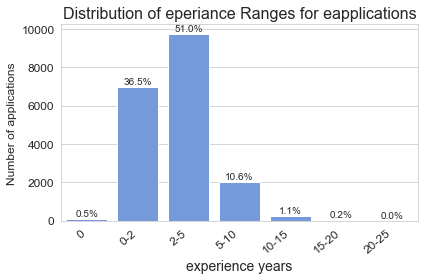

In [27]:
ax = sns.countplot(data = data_df, 
                   x = 'experience_years',
                   color = 'cornflowerblue',order = ['0', '0-2', '2-5', '5-10', '10-15', '15-20', '20-25'])

plt.xticks(size = 12)
plt.yticks(size = 12)

plt.xlabel('experience years', size = 14)
plt.ylabel('Number of applications', size = 12)
plt.title("Distribution of eperiance Ranges for eapplications", size = 16)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

num_of_rows = len(data_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / num_of_rows:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

plt.tight_layout()
plt.show()

## Show The most popular Job Industries

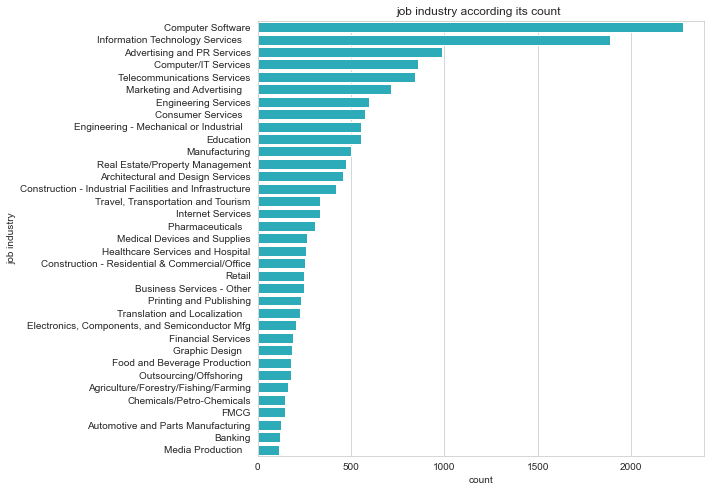

In [47]:
plt.figure(figsize=[8,8])
order=data_df['industry'].value_counts()
order=pd.DataFrame(order)
order=order.head(35)
order=order.index
blue=sns.color_palette()[9]
sns.countplot(data=data_df,y='industry',order=order,color=blue);
plt.title("job industry according its count ");
plt.ylabel('job industry');

## show City years Distribution


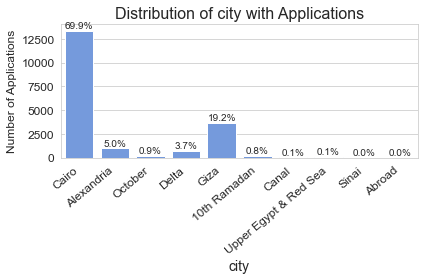

In [43]:
ax = sns.countplot(data = data_df, 
                   x = 'city',
                   color = 'cornflowerblue',order =['Cairo', 'Alexandria', 'October', 'Delta', 'Giza',
                                                    '10th Ramadan', 'Canal', 'Upper Egypt & Red Sea', 'Sinai',
                                                    'Abroad'])

plt.xticks(size = 12)
plt.yticks(size = 12)

plt.xlabel('city', size = 14)
plt.ylabel('Number of Applications', size = 12)
plt.title("Distribution of city with Applications", size = 16)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

num_of_rows = len(data_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / num_of_rows:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

plt.tight_layout()
plt.show()

## Get Distribution for Salary range

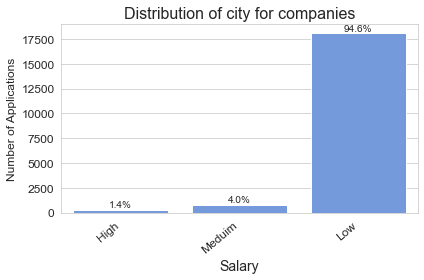

In [44]:
ax = sns.countplot(data = data_df, 
                   x = 'salary_range',
                   color = 'cornflowerblue',order =['High', 'Meduim', 'Low'])

plt.xticks(size = 12)
plt.yticks(size = 12)

plt.xlabel('Salary', size = 14)
plt.ylabel('Number of Applications', size = 12)
plt.title("Distribution of city for companies", size = 16)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")

num_of_rows = len(data_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / num_of_rows:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

plt.tight_layout()
plt.show()

## Show the distribution of Minimum & Maximum salary in Egyptian Pound

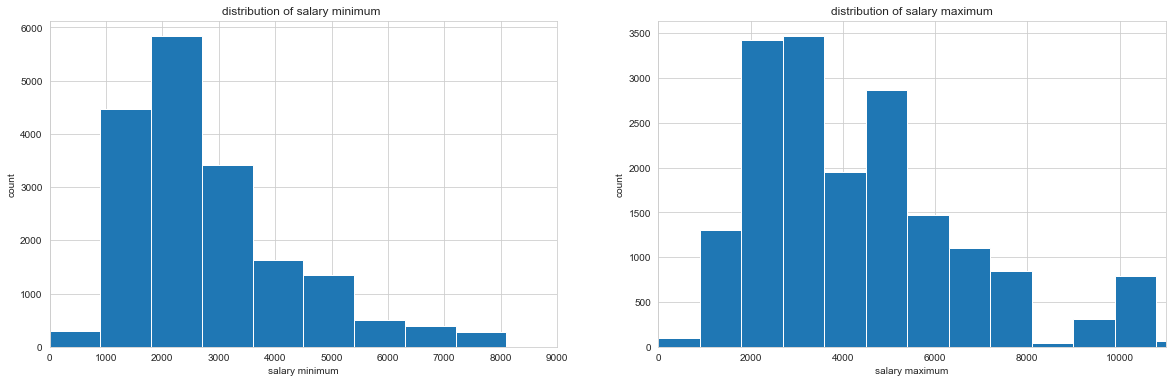

In [48]:
plt.figure(figsize=[20,6]);

plt.subplot(1,2,1)
bins=np.arange(0,75000+900,900)
plt.hist(data=data_df.query("currency== 'Egyptian Pound' "),x='salary_minimum',bins=bins);
plt.xlim(0,9000);
plt.xlabel('salary minimum');
plt.ylabel('count')
plt.title('distribution of salary minimum ');

plt.subplot(1,2,2)
plt.hist(data=data_df.query("currency== 'Egyptian Pound' "),x='salary_maximum',bins=bins);
plt.xlim(0,11000);
plt.xlabel('salary maximum');
plt.ylabel('count');
plt.title('distribution of salary maximum');

In [ ]:
data_df.to_csv('Wuzzuf')